Keep in mind:

With some forward thinking you can design the charts (tables, graphs, etc.) already before
running the experiments. If you can write simple scripts that produce the charts from your raw
data, then you just push the start button and wait till your charts are automatically filled. This
prevents “tweaking” the outcomes afterwards and makes a smooth and efficient workflow. This
is very important, because the first ideas (implementations, experimental scenarios, data plots,
etc.) never work out as intended. Experiments bring new insights and these lead to
reformulating the RQ or RG, and/or changing the algorithm, and/or changing the experimental
setup, etc. This means that you have to iterate a lot, changing some details and re-run the
experiments. Automating everything allows you to do more tests and gives you more time for
thinking

C:\Users\rickg\AppData\Local\Temp\ipykernel_6212\1971360857.py:18: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(results_path, delim_whitespace=True)


    gen       best       mean        std
0     0  86.040905   1.357745  15.268180
2     0  86.040905   1.357745  15.268180
4     1  86.040905   1.357745  15.268180
6     2  86.040905   1.357745  15.268180
8     3  86.040905   1.357745  15.268180
10    4  87.297367  44.320277  26.106479
12    5  87.297367  44.320277  26.106479
14    6  87.297367  44.320277  26.106479
16    7  87.297367  44.320277  26.106479
18    8  87.297367  44.320277  26.106479
Plot saved at: basic_helloworld_3\evolution_plot.png


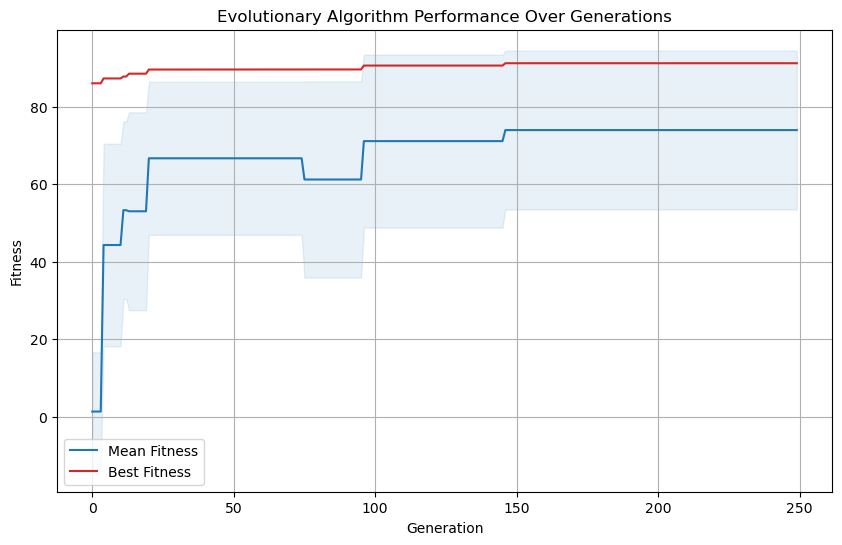

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def plot_evolutionary_results(results_folder="basic_helloworld_3", results_file="results.txt"):
    # Define the path to the results file
    #script_dir = os.path.dirname(os.path.abspath(__file__))
    results_path = os.path.join(results_folder, results_file)
    
    # Check if the file exists
    if not os.path.exists(results_path):
        print(f"Results file not found at: {results_path}")
        return
    
    #read
    try:
        #read the file into a pandas DataFrame
        df = pd.read_csv(results_path, delim_whitespace=True)

        #filter only rows where 'best', 'mean', 'std' are numeric
        df = df[pd.to_numeric(df['best'], errors='coerce').notnull()]
        
        #convert columns to numeric
        df['best'] = pd.to_numeric(df['best'])
        df['mean'] = pd.to_numeric(df['mean'])
        df['std'] = pd.to_numeric(df['std'])
        df['gen'] = pd.to_numeric(df['gen'])

        #extract generations, best, mean, and std fitness values
        generations = df['gen']
        best_fitness = df['best']
        mean_fitness = df['mean']
        std_fitness = df['std']
        
    except Exception as e:
        print(f"Error reading the file: {e}")
        return

    print(df[['gen', 'best', 'mean', 'std']].head(10))  
    #plotting the data
    plt.figure(figsize=(10, 6))

    
    #plot mean fitness with shaded standard deviation region
    plt.plot(generations, mean_fitness, label="Mean Fitness", color="#1f77b4")
    plt.fill_between(generations, mean_fitness - std_fitness, mean_fitness + std_fitness, color="#1f77b4", alpha=0.1)

    #plot best fitness
    plt.plot(generations, best_fitness, label="Best Fitness", color='green')

    plt.xlabel('Generation')
    plt.ylabel('Fitness')
    plt.title('Evolutionary Algorithm Performance Over Generations')
    plt.legend()
    plt.grid()

    #save the plot as an image file
    plot_file = os.path.join(results_folder, 'evolution_plot.png')
    #plt.savefig(plot_file)
    print(f"Plot saved at: {plot_file}")
    
    #show the plot
    plt.show()

plot_evolutionary_results()


C:\Users\rickg\AppData\Local\Temp\ipykernel_6212\796640498.py:30: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(result_file, delim_whitespace=True)
C:\Users\rickg\AppData\Local\Temp\ipykernel_6212\796640498.py:30: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(result_file, delim_whitespace=True)
C:\Users\rickg\AppData\Local\Temp\ipykernel_6212\796640498.py:30: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(result_file, delim_whitespace=True)
C:\Users\rickg\AppData\Local\Temp\ipykernel_6212\796640498.py:30: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  d

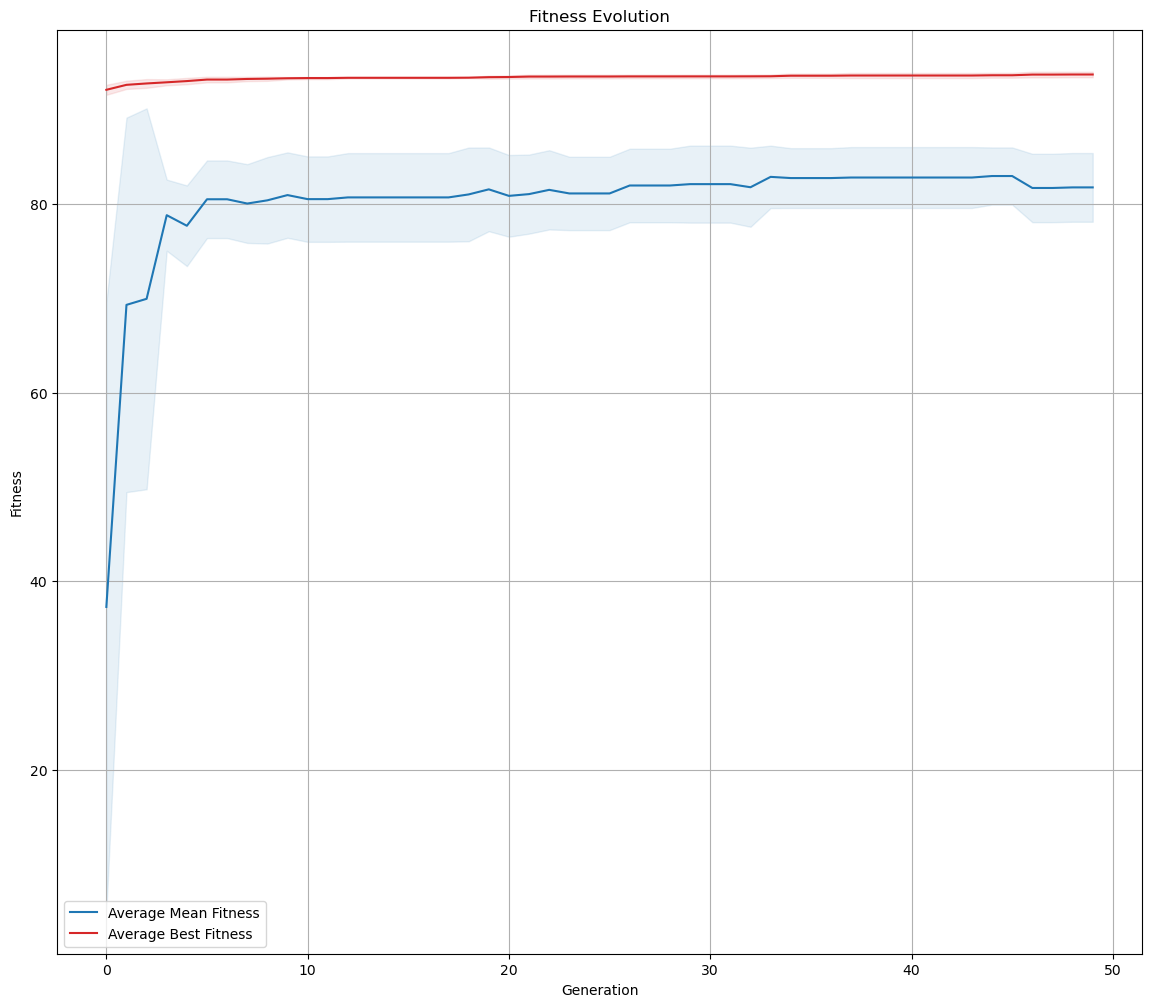

0

In [61]:
import os
import pandas as pd
import matplotlib.pyplot as plt

#set the enemy you want to process
enemy = 2
#set the directory where the 10 runs are stored
enemy_folder = os.path.join('basic_results_for_plotting', f"enemy_{enemy}", 'pop_100_mg_50')

def process_results_for_enemy(enemy_folder, enemy):
    """
    Process all 10 results txt files to later make the plot
    """
    
    if not os.path.isdir(enemy_folder):
        print(f"Enemy folder not found: {enemy_folder}")
        return

    all_dfs = [] #define empty all_dfs

    #iterate through the run folders (e.g., run_1_x, run_2_x, etc.)
    for run_folder in os.listdir(enemy_folder):
        run_path = os.path.join(enemy_folder, run_folder)
        
        if os.path.isdir(run_path):
            result_file = os.path.join(run_path, 'results.txt')  #each run has a 'results' file
            
            if os.path.exists(result_file):
                #read results file
                df = pd.read_csv(result_file, delim_whitespace=True)
                df = df[pd.to_numeric(df['best'], errors='coerce').notnull()]  #clean invalid rows
                
                #convert columns to numeric
                df['best'] = pd.to_numeric(df['best'])
                df['mean'] = pd.to_numeric(df['mean'])
                df['std'] = pd.to_numeric(df['std'])
                df['gen'] = pd.to_numeric(df['gen'])

                #append DataFrame to the list
                all_dfs.append(df)
    return all_dfs  

            
def make_line_plot_across_gens(all_dfs):
    if all_dfs:
        #concat all dataframes
        combined_df = pd.concat(all_dfs)
    
        #group by gen and calculate mean and std for mean and best fitness
        grouped_stats = combined_df.groupby('gen').agg(
            mean_avg_fitness=('mean', 'mean'),
            std_avg_fitness=('mean', 'std'),
            mean_max_fitness=('best', 'mean'),
            std_max_fitness=('best', 'std')
        )
    
        plt.figure(figsize=(14, 12))
        generations = grouped_stats.index
    
        #plot mean fitnss with standard deviation shading
        plt.plot(generations, grouped_stats['mean_avg_fitness'], label="Average Mean Fitness", color="#1f77b4")
        plt.fill_between(generations, 
                         grouped_stats['mean_avg_fitness'] - grouped_stats['std_avg_fitness'],
                         grouped_stats['mean_avg_fitness'] + grouped_stats['std_avg_fitness'],
                         color="#1f77b4", alpha=0.1)
    
        #plot best fitness with standard deviation shading
        plt.plot(generations, grouped_stats['mean_max_fitness'], label="Average Best Fitness", color="#d62728")
        plt.fill_between(generations, 
                         grouped_stats['mean_max_fitness'] - grouped_stats['std_max_fitness'],
                         grouped_stats['mean_max_fitness'] + grouped_stats['std_max_fitness'],
                         color="#d62728", alpha=0.1)
    
        plt.xlabel('Generation')
        plt.ylabel('Fitness')
        plt.title(f'Fitness Evolution')
        plt.legend()
        plt.grid()
    
        #save plot in the enemy folder
        #plot_file = os.path.join(enemy_folder, f'fitness_plot.png')
        #plt.savefig(plot_file)
        #print(f"Plot saved at: {plot_file}")
    
        #show plot
        plt.show()
        
    return 0
            

all_dfs = process_results_for_enemy(enemy_folder, enemy)
make_line_plot_across_gens(all_dfs)


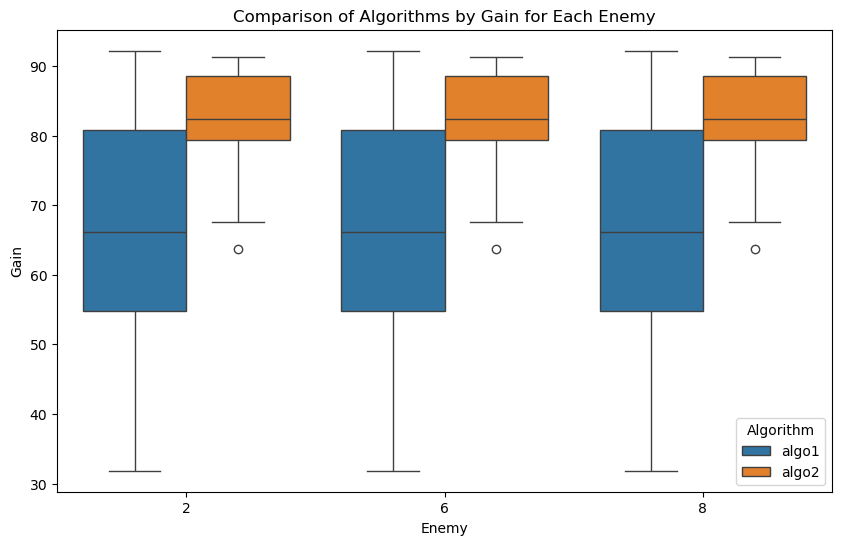

Enemy 2 - T-test between algo1 and algo2: t-stat=-2.2262, p-value=0.0390
Result is significant for enemy 2.

Enemy 6 - T-test between algo1 and algo2: t-stat=-2.2262, p-value=0.0390
Result is significant for enemy 6.

Enemy 8 - T-test between algo1 and algo2: t-stat=-2.2262, p-value=0.0390
Result is significant for enemy 8.



In [65]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set the algorithms and enemies to compare
ALGORITHMS = ["algo1", "algo2"]
ENEMIES = [2, 6, 8]  # List of enemies to process

def read_gains(file_path):
    """
    Read the gains from the JSON file and calculate the mean gain for each run.
    """
    with open(file_path, 'r') as f:
        data = json.load(f)
    
    mean_gains = []
    for run_key, gains in data.items():
        # Calculate the mean for each run (5 gains per run)
        mean_gains.append(sum(gains) / len(gains))
    
    return mean_gains

def gather_data(base_folder, algorithms, enemies):
    """
    Retrieve the mean gains for each enemy and algorithm from the JSON files.
    """
    data = []

    for enemy in enemies:
        for algo in algorithms:
            file_path = os.path.join(base_folder, algo, f"enemy_{enemy}_gains.json")
            if os.path.exists(file_path):
                mean_gains = read_gains(file_path)
                # Store each mean gain along with its associated algorithm and enemy
                data.extend([[enemy, algo, gain] for gain in mean_gains])
            else:
                print(f"File not found: {file_path}")
    
    return pd.DataFrame(data, columns=['Enemy', 'Algorithm', 'Gain'])

def generate_boxplots(df):
    """
    Generate box plots comparing algorithms by enemy using the gathered data.
    """
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Enemy', y='Gain', hue='Algorithm', data=df)
    plt.title('Comparison of Algorithms by Gain for Each Enemy')
    plt.show()

def perform_statistical_tests(df, enemies, algorithms):
    """
    Perform statistical tests (t-test or Mann-Whitney U test) between algorithms for each enemy.
    """
    for enemy in enemies:
        algo1_gains = df[(df['Enemy'] == enemy) & (df['Algorithm'] == algorithms[0])]['Gain']
        algo2_gains = df[(df['Enemy'] == enemy) & (df['Algorithm'] == algorithms[1])]['Gain']
        
        # Perform a t-test (or you can use Mann-Whitney U test if needed)
        t_stat, p_value = stats.ttest_ind(algo1_gains, algo2_gains)
        
        print(f"Enemy {enemy} - T-test between {algorithms[0]} and {algorithms[1]}: t-stat={t_stat:.4f}, p-value={p_value:.4f}")
        if p_value < 0.05:
            print(f"Result is significant for enemy {enemy}.\n")
        else:
            print(f"Result is not significant for enemy {enemy}.\n")

        

# Main script
if __name__ == "__main__":
    base_folder = 'dummy_data_box_plot'  # Folder where data is stored

    # Step 1: Gather data from JSON files
    df = gather_data(base_folder, ALGORITHMS, ENEMIES)

    # Step 3: Perform statistical tests to compare the algorithms
    perform_statistical_tests(df, ENEMIES, ALGORITHMS)

    # Step 2: Generate boxplots comparing the algorithms for each enemy
    generate_boxplots(df)
